# Import datasets

In [1]:
import pandas as pd

In [2]:
popularity = pd.read_csv("steamcharts.csv")
appdata = pd.read_csv("steam_app_data.csv", dtype={10: "string"})
headers = pd.read_csv("id_name.csv")

# Keep only rows that we have player data for

**Part of the cleaning process, does nothing the second time around**

In [3]:
usable_ids = popularity['steam_appid'].unique()

In [4]:
appdata = appdata[appdata['steam_appid'].isin(usable_ids)]
headers = headers[headers['appid'].isin(usable_ids)]

## Write the changes back to file - save space

In [5]:
appdata.to_csv('steam_app_data.csv', index=False)
headers.to_csv('id_name.csv', index=False)

In [6]:
appdata.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'fullgame', 'supported_languages', 'header_image',
       'website', 'pc_requirements', 'mac_requirements', 'linux_requirements',
       'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers',
       'publishers', 'demos', 'price_overview', 'packages', 'package_groups',
       'platforms', 'metacritic', 'reviews', 'categories', 'genres',
       'screenshots', 'movies', 'recommendations', 'achievements',
       'release_date', 'support_info', 'background', 'content_descriptors'],
      dtype='object')

In [7]:
popularity.columns

Index(['month', 'avg_players', 'gain', 'gain_percent', 'peak_players', 'name',
       'steam_appid'],
      dtype='object')

In [8]:
#Removing columns that will not be of use
appdata = appdata.drop(['name','dlc', 'detailed_description', 'about_the_game','short_description',
                        'fullgame','header_image','website', 'pc_requirements', 'mac_requirements','linux_requirements','legal_notice',
                        'drm_notice', 'ext_user_account_notice', 'demos', 'price_overview',
                        'packages', 'package_groups', 'reviews','screenshots','movies', 'achievements', 'controller_support', 'metacritic',
                        'support_info', 'background','content_descriptors', 'recommendations'], axis=1)
popularity = popularity.drop(['name', 'gain'],  axis=1)

In [9]:
appdata.columns

Index(['type', 'steam_appid', 'required_age', 'is_free', 'supported_languages',
       'developers', 'publishers', 'platforms', 'categories', 'genres',
       'release_date'],
      dtype='object')

In [10]:
#Changing data types
popularity['month'] = pd.to_datetime(popularity['month'], format='%b-%y')
#In case it interprets 25 as 1925 and not 2025
popularity.loc[popularity['month'].dt.year < 2000, 'month'] += pd.DateOffset(years=100)

# Merging datasets

In [11]:
headers.head()

,appid,name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force


In [12]:
popularity.head()

,month,avg_players,gain_percent,peak_players,steam_appid
0,2025-09-01,7805.25,0.1276,13254,10
1,2025-08-01,6922.13,-0.0610,12168,10
2,2025-07-01,7371.48,-0.1016,13951,10
3,2025-06-01,8204.98,-0.0936,15798,10
4,2025-05-01,9052.51,-0.0495,15333,10


In [13]:
appdata.head()

,type,steam_appid,required_age,is_free,supported_languages,developers,publishers,platforms,categories,genres,release_date
0,game,10,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
1,game,20,0.0,False,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Apr, 1999'}"
2,game,30,0.0,False,"English, French, German, Italian, Spanish - Spain",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 May, 2003'}"
3,game,40,0.0,False,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Jun, 2001'}"
4,game,50,0.0,False,"English, French, German, Korean",['Gearbox Software'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 1999'}"


In [14]:
main = (
    popularity
        .merge(headers, left_on='steam_appid', right_on='appid', how='left')
        .merge(appdata, on='steam_appid', how='left')
)

main = main.drop(columns='appid')
main.head()



,month,avg_players,gain_percent,peak_players,steam_appid,name,type,required_age,is_free,supported_languages,developers,publishers,platforms,categories,genres,release_date
0,2025-09-01,7805.25,0.1276,13254,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
1,2025-08-01,6922.13,-0.0610,12168,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
2,2025-07-01,7371.48,-0.1016,13951,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
3,2025-06-01,8204.98,-0.0936,15798,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
4,2025-05-01,9052.51,-0.0495,15333,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"


In [15]:
import re

def clean_languages(cell):
    if pd.isna(cell):
        return []
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', cell)
    # Remove extra notes like "*languages with full audio support"
    text = re.sub(r'\*.*languages with full audio support', '', text, flags=re.IGNORECASE)
    languages = [lang.strip() for lang in text.split(',') if lang.strip()]
    # Split by comma
    return languages

# Apply cleaning
main['supported_languages_clean'] = main['supported_languages'].apply(clean_languages)

# Flatten all lists to get unique languages
all_languages = [lang for sublist in main['supported_languages_clean'] for lang in sublist]
unique_languages = sorted(set(all_languages))

print(unique_languages)

['#lang_slovakian', 'Afrikaans', 'Albanian', 'Alemán', 'Alemán*', 'Alemão', 'Alemão*', 'Allemand', 'Allemand*', 'Amharic', 'Angielski', 'Angielski*', 'Anglais', 'Anglais*', 'Anglais**Langues avec support audio complet', 'Angol*', 'Arabic', 'Arabisch', 'Armenian', 'Assamese', 'Azerbaijani', 'Bangla', 'Basque', 'Belarusian', 'Bhs. Belanda', 'Bhs. Ceko*bahasa dengan dukungan audio penuh', 'Bhs. Inggris*', 'Bhs. Italia*', 'Bhs. Jepang*', 'Bhs. Jerman*', 'Bhs. Korea', 'Bhs. Polandia', 'Bhs. Portugis - Brasil*', 'Bhs. Prancis*', 'Bhs. Rusia*', 'Bhs. Spanyol - Spanyol*', 'Bhs. Tionghoa Sederhana', 'Bhs. Tionghoa Tradisional', 'Bosnian', 'Brasilianisches Portugiesisch', 'Brasilianisches Portugiesisch*', 'Brasilianisches Portugiesisch*Sprachen mit voller Audiounterstützung', 'Brazíliai portugál', 'Bulgarian', 'Bułgarski', 'Búlgaro', 'Catalan', 'Ceco*lingue con supporto audio completo', 'Checo', 'Checo*idiomas con localización de audio', 'Cherokee', 'Chinesisch (traditionell)', 'Chinesisch (trad

In [16]:
allowed_tags = ['English', 'Spanish', 'French', 'German', 'Russian', 'Chinese', 'Japanese', 'Italian', 'Finnish', 'Estonian', 'Swedish']

# Filter rows where 'tags' list contains any allowed_tags
main['supported_languages_clean'] = main['supported_languages_clean'].apply(
    lambda lst: [tag for tag in lst if tag in allowed_tags]
)

main.head()

,month,avg_players,gain_percent,peak_players,steam_appid,name,type,required_age,is_free,supported_languages,developers,publishers,platforms,categories,genres,release_date,supported_languages_clean
0,2025-09-01,7805.25,0.1276,13254,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]
1,2025-08-01,6922.13,-0.0610,12168,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]
2,2025-07-01,7371.48,-0.1016,13951,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]
3,2025-06-01,8204.98,-0.0936,15798,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]
4,2025-05-01,9052.51,-0.0495,15333,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]


In [17]:
popularity['month'].value_counts()

month
2019-04-01    6029
2019-08-01    6022
2019-07-01    6006
2019-06-01    5973
2019-05-01    5936
              ... 
2012-11-01     975
2012-10-01     946
2012-09-01     911
2012-08-01     886
2012-07-01     860
Name: count, Length: 159, dtype: int64

In [18]:
main['release_date'].value_counts()
#main["release_date"].iloc[0]

release_date
{'coming_soon': False, 'date': ''}                7677
{'coming_soon': False, 'date': '30 Aug, 2006'}    2191
{'coming_soon': False, 'date': '24 Aug, 2009'}    1908
{'coming_soon': False, 'date': '5 Apr, 2016'}     1683
{'coming_soon': False, 'date': '15 May, 2014'}    1624
                                                  ... 
{'coming_soon': False, 'date': '11 Aug, 2020'}       1
{'coming_soon': False, 'date': '26 Jun, 2020'}       1
{'coming_soon': False, 'date': '9 Oct, 2020'}        1
{'coming_soon': False, 'date': '24 Jan, 2020'}       1
{'coming_soon': False, 'date': '7 Aug, 2019'}        1
Name: count, Length: 2675, dtype: int64

## Cleaning release date

In [19]:
import ast

main["release_date"] = main["release_date"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [20]:
main["release_date"] = pd.to_datetime(
    main["release_date"].apply(lambda x: x.get("date") if isinstance(x, dict) else None),
    format="%d %b, %Y",
    errors="coerce"
)


## Cleaning categories and genres

In [21]:
#Only for selected English genres
valid_genres = {
    "Action",
    "Adventure",
    "Casual",
    "Indie",
    "Strategy",
    "RPG",
    "Simulation",
    "Racing",
    "Sports",
    "Massively Multiplayer",
    "Free to Play",
    "Video Production",
    "Audio Production",
    "Design & Illustration",
    "Photo Editing",
    "Education",
    "Utilities",
    "Animation & Modeling",
    "Web Publishing",
    "Software Training"
}

#For categories
valid_categories = {
    "Single-player",
    "Multi-player",
    "PvP",
    "Online PvP",
    "LAN PvP",
    "Shared/Split Screen PvP",
    "Co-op",
    "Online Co-op",
    "LAN Co-op",
    "Shared/Split Screen Co-op",
    "Shared/Split Screen",
    "Cross-Platform Multiplayer",
    "Steam Achievements",
    "Full controller support",
    "Partial controller support",
    "Steam Trading Cards",
    "Steam Cloud",
    "Remote Play on Phone",
    "Remote Play on Tablet",
    "Remote Play on TV",
    "Remote Play Together",
    "MMO",
    "Captions available",
    "VR Supported",
    "VR Only",
    "Valve Anti-Cheat enabled",
    "In-App Purchases",
    "Steam Workshop",
    "Stats",
    "Includes level editor",
    "Steam Leaderboards",
    "Cloud Gaming",
    "Family Sharing",
    "HDR available",
    "Controller",
    "Multi-player",
    "Single-player",
    "Online Multiplayer",
    "Downloadable Content",
    "Steam Turn Notifications",
}

In [22]:
#Makinga list from genres
def to_list_fast(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return x if isinstance(x, list) else []

In [23]:
#SAFE STRING → LIST CONVERSION
main['genres_parsed'] = main['genres'].apply(to_list_fast)
main['categories_parsed'] = main['categories'].apply(to_list_fast)

In [24]:
#EXPLODE + EXTRACT DESCRIPTIONS

In [25]:
genres_exp = main[['steam_appid', 'genres_parsed']].explode('genres_parsed')
genres_exp['genre_desc'] = genres_exp['genres_parsed'].apply(
    lambda d: d.get('description') if isinstance(d, dict) else None
)

In [26]:
categories_exp = main[['steam_appid', 'categories_parsed']].explode('categories_parsed')
categories_exp['cat_desc'] = categories_exp['categories_parsed'].apply(
    lambda d: d.get('description') if isinstance(d, dict) else None
)

In [27]:
#KEEP ONLY ENGLISH (WHITELIST)

In [28]:
genres_exp = genres_exp[genres_exp['genre_desc'].isin(valid_genres)]
categories_exp = categories_exp[categories_exp['cat_desc'].isin(valid_categories)]

In [29]:
#GROUP BACK TO LISTS

In [30]:
genres_clean = genres_exp.groupby('steam_appid')['genre_desc'].agg(list)
categories_clean = categories_exp.groupby('steam_appid')['cat_desc'].agg(list)

In [31]:
main['genres_clean'] = main['steam_appid'].map(genres_clean).apply(lambda x: x if isinstance(x, list) else [])
main['categories_clean'] = main['steam_appid'].map(categories_clean).apply(lambda x: x if isinstance(x, list) else [])

In [32]:
#CHECKING WHETHER IT WORKED

In [33]:
main[['genres_clean','categories_clean']].head()

,genres_clean,categories_clean
0,"[Action, Action, Action, Action, Action, Actio...","[Multi-player, PvP, Online PvP, Shared/Split S..."
1,"[Action, Action, Action, Action, Action, Actio...","[Multi-player, PvP, Online PvP, Shared/Split S..."
2,"[Action, Action, Action, Action, Action, Actio...","[Multi-player, PvP, Online PvP, Shared/Split S..."
3,"[Action, Action, Action, Action, Action, Actio...","[Multi-player, PvP, Online PvP, Shared/Split S..."
4,"[Action, Action, Action, Action, Action, Actio...","[Multi-player, PvP, Online PvP, Shared/Split S..."


## Classifying success tier through player counts

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Aggregate per game
agg_pop = popularity.groupby('steam_appid').agg(
    avg_players_mean=('avg_players', 'mean'),
    peak_players_max=('peak_players', 'max'),
    gain_percent_mean=('gain_percent', 'mean')
).reset_index()

scaler = MinMaxScaler()

agg_pop[['avg_norm', 'peak_norm', 'gain_norm']] = scaler.fit_transform(
    agg_pop[['avg_players_mean', 'peak_players_max', 'gain_percent_mean']]
)

agg_pop['success_score'] = (
    0.5 * agg_pop['peak_norm'] +
    0.3 * agg_pop['avg_norm'] +
    0.2 * agg_pop['gain_norm']
)

agg_pop['tier'] = pd.qcut(agg_pop['success_score'], q=[0, 0.4, 0.7, 0.9, 1.0],
                         labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

In [35]:
tiers = (
    agg_pop
        .merge(headers, left_on='steam_appid', right_on='appid', how='left')
)
platinum_games = tiers[tiers['tier'] == 'Platinum']

pd.set_option('display.max_rows', None)
platinum_games[['name', 'tier']]

,name,tier
0,Counter-Strike,Platinum
6,Half-Life,Platinum
9,Half-Life 2,Platinum
10,Counter-Strike: Source,Platinum
18,Team Fortress 2,Platinum
20,Left 4 Dead 2,Platinum
21,Portal 2,Platinum
22,Alien Swarm,Platinum
23,Counter-Strike: Global Offensive,Platinum
24,Killing Floor,Platinum


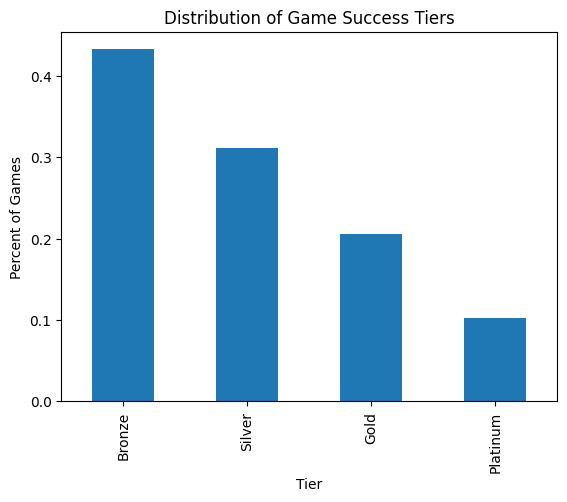

In [36]:
import matplotlib.pyplot as plt

tier_counts = tiers['tier'].value_counts()
tier_percentages = tier_counts / len(main) * 100

tier_percentages.plot(kind='bar')
plt.title("Distribution of Game Success Tiers")
plt.xlabel("Tier")
plt.ylabel("Percent of Games")
plt.show()

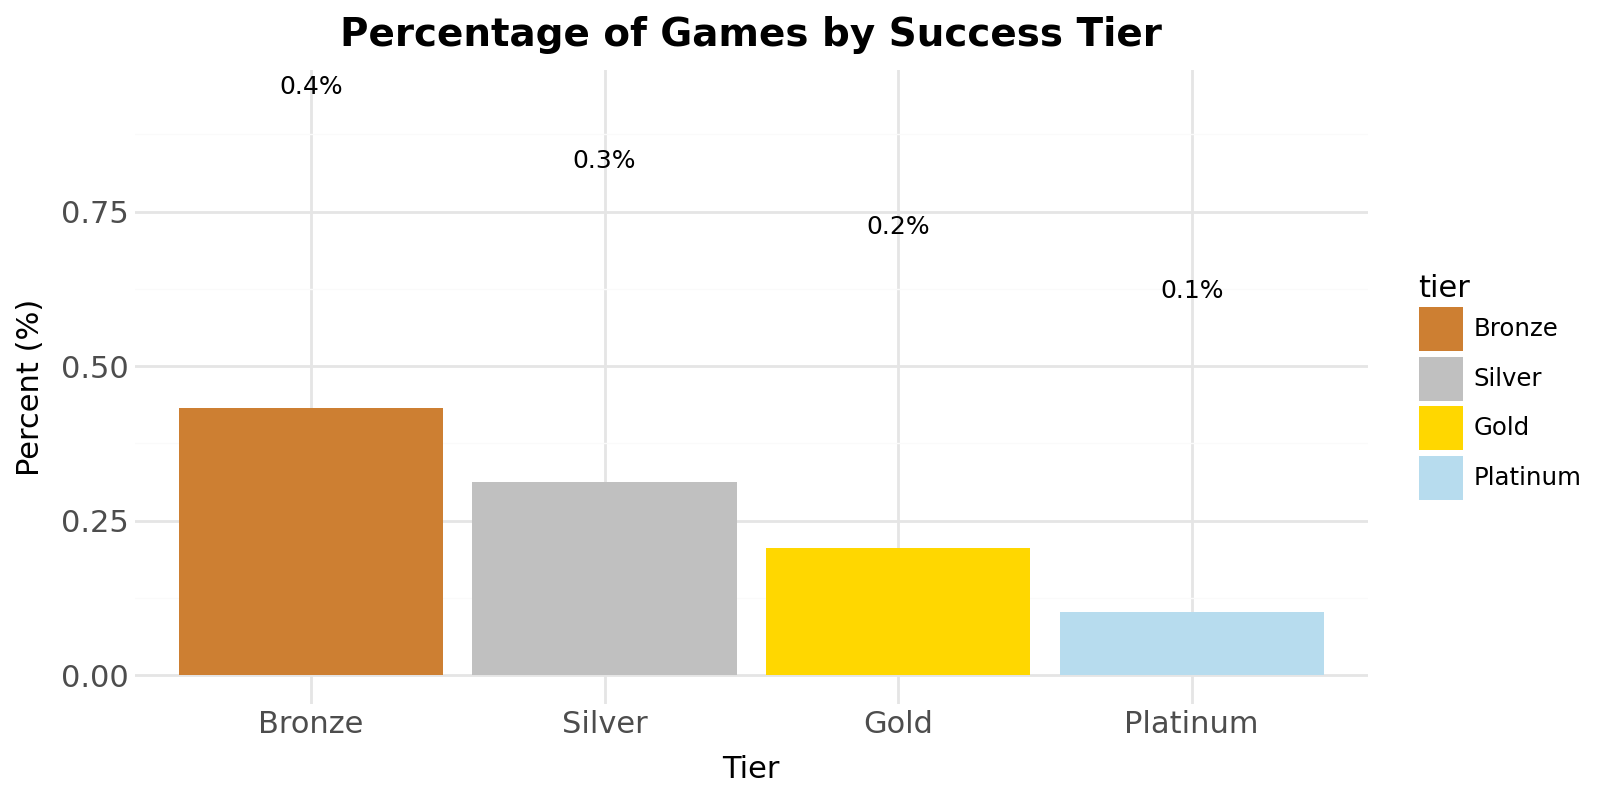

In [37]:
import plotnine as p9
import pandas as pd

# Define tier order and colors
tier_order = ["Bronze", "Silver", "Gold", "Platinum"]
tier_colors = {
    "Bronze":   "#CD7F32",
    "Silver":   "#C0C0C0",
    "Gold":     "#FFD700",
    "Platinum": "#B7DCEE"
}

# Convert tier_percentages (Series) to DataFrame
data = (
    tier_percentages
    .reindex(tier_order)
    .dropna()
    .reset_index()
)
data.columns = ["tier", "percentage"]

# ⭐️ Make tier an ordered categorical (this is the fix)
data['tier'] = pd.Categorical(
    data['tier'],
    categories=tier_order,
    ordered=True
)

# Plot with plotnine
(
    p9.ggplot(data, p9.aes(x='tier', y='percentage', fill='tier'))
    + p9.geom_col()
    + p9.scale_fill_manual(values=tier_colors)
    + p9.geom_text(
        p9.aes(label=data['percentage'].round(1).astype(str) + '%'),
        va='bottom', size=9, nudge_y=0.5
    )
    + p9.labs(
        title="Percentage of Games by Success Tier",
        x="Tier",
        y="Percent (%)"
    )
    + p9.theme_minimal()
    + p9.theme(
        axis_text_x=p9.element_text(rotation=0, size=11),
        axis_text_y=p9.element_text(size=11),
        plot_title=p9.element_text(size=14, weight='bold'),
        figure_size=(8, 4)
    )
)


In [38]:
# Print row 691
print(platinum_games.loc[691])

steam_appid               56400
avg_players_mean     465.244465
peak_players_max           6617
gain_percent_mean      0.003428
avg_norm               0.000986
peak_norm              0.002045
gain_norm              0.000023
success_score          0.001323
tier                   Platinum
appid                       NaN
name                        NaN
Name: 691, dtype: object


## Finding what correlates with popularity

In [39]:
#First we need to merge the success score and tier into our dataframe

In [40]:
main = main.merge(
    agg_pop[['steam_appid', 'success_score']], 
    on='steam_appid', 
    how='left'
)

main = main.merge(
    agg_pop[['steam_appid', 'tier']], 
    on='steam_appid', 
    how='left'
)

In [41]:
#Then we create numeric versions of important features

In [42]:
main['num_languages'] = main['supported_languages_clean'].apply(lambda x: len(x) if isinstance(x, list) else 0)
main['num_genres'] = main['genres_clean'].apply(lambda x: len(x) if isinstance(x, list) else 0)
main['num_categories'] = main['categories_clean'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [43]:
#Now we'll select only numeric columns for correlation heatmap

In [44]:
numeric_cols = [
    'avg_players', 
    'gain_percent',
    'peak_players',
    'required_age',
    'is_free',
    'num_languages',
    'num_genres',
    'num_categories',
    'success_score'
]

In [45]:
#Computing correlation matrix and heatmap

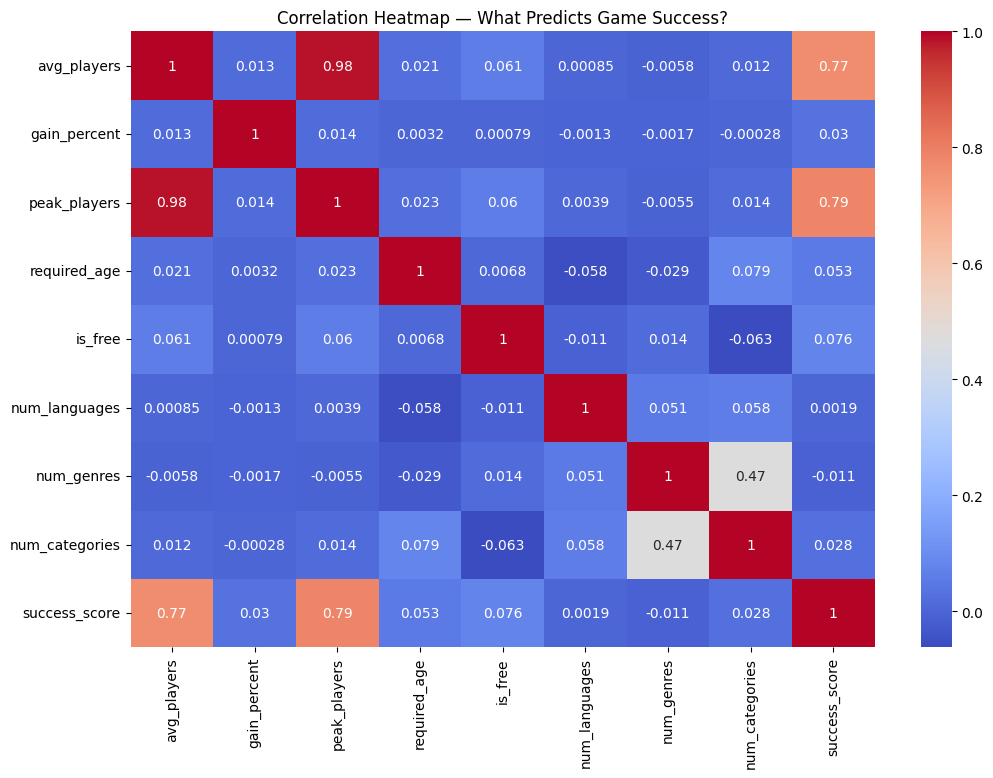

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = main[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap — What Predicts Game Success?")
plt.show()


In [47]:
#This should give us strong/weak indicators of success

In [48]:
# Genre -> success correlation

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb_genres = MultiLabelBinarizer()
genres_dummies = pd.DataFrame(
    mlb_genres.fit_transform(main['genres_clean']),
    columns=mlb_genres.classes_,
    index=main.index
)

genre_success_corr = genres_dummies.corrwith(main['success_score']).sort_values(ascending=False)

print("\nGenre correlations with success:\n")
print(genre_success_corr)


Genre correlations with success:

Free to Play             0.398940
Massively Multiplayer    0.065331
Action                   0.029752
RPG                      0.011418
Photo Editing            0.006835
Adventure                0.005018
Animation & Modeling    -0.000719
Design & Illustration   -0.003447
Utilities               -0.005729
Audio Production        -0.005873
Web Publishing          -0.006515
Software Training       -0.006567
Education               -0.006739
Video Production        -0.007676
Racing                  -0.011212
Sports                  -0.012091
Simulation              -0.012540
Strategy                -0.017588
Indie                   -0.028579
Casual                  -0.033587
dtype: float64


In [50]:
# Categories -> success correlation

In [51]:
mlb_categories = MultiLabelBinarizer()
categories_dummies = pd.DataFrame(
    mlb_categories.fit_transform(main['categories_clean']),
    columns=mlb_categories.classes_,
    index=main.index
)

category_success_corr = categories_dummies.corrwith(main['success_score']).sort_values(ascending=False)

print("\nCategory correlations with success:\n")
print(category_success_corr)


Category correlations with success:

Remote Play on Tablet         0.121801
Remote Play on Phone          0.086435
HDR available                 0.073893
Online Co-op                  0.063620
Online PvP                    0.062481
PvP                           0.057494
Co-op                         0.047900
In-App Purchases              0.043500
Valve Anti-Cheat enabled      0.042539
Multi-player                  0.041757
Steam Workshop                0.038267
LAN Co-op                     0.035571
Stats                         0.034437
MMO                           0.030003
LAN PvP                       0.026384
Cross-Platform Multiplayer    0.023571
Remote Play on TV             0.021087
Steam Trading Cards           0.012928
Full controller support       0.012797
Includes level editor         0.010314
VR Supported                  0.009728
Captions available            0.007148
Steam Achievements            0.004560
Steam Cloud                   0.003409
Steam Turn Notifications  

In [52]:
# Publisher influence

In [53]:
main['publishers'] = main['publishers'].astype('category')

publisher_success = (
    main.groupby('publishers')['success_score']
        .mean()
        .sort_values(ascending=False)
)

print("\nTop publishers by average success score:\n")
print(publisher_success.head(20))



Top publishers by average success score:

publishers
['KRAFTON, Inc.']                                                          0.469900
['Focus Entertainment', '4Divinity']                                       0.135416
['Re-Logic']                                                               0.089965
['Studio Wildcard', 'Snail Games USA']                                     0.064791
['ConcernedApe']                                                           0.054496
['Wallpaper Engine Team']                                                  0.049050
['Grinding Gear Games']                                                    0.048775
['Warhorse Studios', 'Deep Silver']                                        0.045698
['Psyonix LLC']                                                            0.042104
['Behaviour Interactive Inc.']                                             0.037591
['Digital Extremes']                                                       0.037100
['Facepunch Studios'] 

/tmp/ipykernel_1321/3530055057.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [54]:
# Free-to-play vs paid

In [55]:
ftf = main.groupby('is_free')['success_score'].mean()
print("\nFree vs Paid success:\n", ftf)


Free vs Paid success:
 is_free
False    0.001082
True     0.004660
Name: success_score, dtype: float64


## Correlation interpretation

- From genre -> success correlation we can see that the top ranked is Free-To-Play. This means that Free-To-Play games tend to be much more successful. There are also moderate correlations between Massively Multiplayer, Action, RPG and Adventure. They are small but indicate mild positive influence. Since the correlations are weak, it means that genre alone doesn't strongly determine success.
- From categories -> success correlation we can see that features tied to online multiplayer, co-op and remote play correlate positively with success. Single-player games tend to perform worse than multiplayer ones.
- From publisher influence our top high-impact publisher is Krafton, Inc (PUBG). Publishing by certain well-known studios increases the chance of high success. This is also one of the strongest predictors in our dataset.
- Free-To-Play vs Paid shoes that F-T-P games have about a 4x higher success score 

## Prediction model

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

# =========================
# 1. SAMPLE DATA
# =========================
main = main.sample(n=10_000, random_state=42).reset_index(drop=True)

# =========================
# 2. IDENTIFY COLUMN TYPES
# =========================
datetime_cols = [c for c in main.columns if "date" in c.lower()]
text_cols = []  # add text-heavy columns if needed
target = "peak_players"

# =========================
# 3. CLEAN DATETIME COLUMNS
# =========================
for col in datetime_cols:
    main[col] = pd.to_datetime(main[col], errors="coerce")
    if main[col].isna().all():
        main.drop(columns=[col], inplace=True)
        continue
    median_ts = main[col].dropna().median()
    main[col] = main[col].fillna(median_ts)
    main[col] = main[col].astype("int64") // 10**9  # convert to unix timestamp

# =========================
# 4. CLEAN OTHER MISSING VALUES
# =========================
for col in main.columns:
    if col == target:
        continue
    if main[col].isna().all():
        main.drop(columns=[col], inplace=True)
        continue

    if main[col].dtype == "object":      # categorical
        main[col] = main[col].astype(str).fillna("Unknown")
    else:                                # numeric
        main[col] = pd.to_numeric(main[col], errors="coerce")
        main[col] = main[col].fillna(main[col].median())

# =========================
# 5. PREPARE FEATURES
# =========================
X = main.drop(columns=[target, "steam_appid"], errors="ignore")
y = main[target]

categorical_features = [
    X.columns.get_loc(c) 
    for c in X.columns 
    if X[c].dtype == "object"
]

# =========================
# 6. TRAIN/TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 7. TRAIN MODEL
# =========================
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=8,
    loss_function="RMSE",
    verbose=100
)

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=categorical_features,
    early_stopping_rounds=50
)

# =========================
# 8. PREDICT
# =========================
preds = model.predict(X_test)
preds = np.clip(preds, 0, None)  # ensure no negative values

# =========================
# 9. EVALUATE
# =========================
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE manually
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

# R² score
r2 = r2_score(y_test, preds)

print("Sample predictions:", preds[:10])
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


0:	learn: 20037.5044118	test: 18817.0736810	best: 18817.0736810 (0)	total: 33.5ms	remaining: 33.5s
100:	learn: 9311.5399453	test: 12184.2776958	best: 12184.2776958 (100)	total: 2.52s	remaining: 22.4s
200:	learn: 5063.9479055	test: 10002.5845822	best: 10002.5845822 (200)	total: 4.68s	remaining: 18.6s
300:	learn: 3304.0326646	test: 9547.8877331	best: 9547.8877331 (300)	total: 6.89s	remaining: 16s
400:	learn: 2251.8845963	test: 9130.1455919	best: 9130.1455919 (400)	total: 9.14s	remaining: 13.7s
500:	learn: 1529.7823139	test: 8871.4161338	best: 8864.0081558 (499)	total: 11.7s	remaining: 11.7s
600:	learn: 1044.0862334	test: 8422.3770353	best: 8420.0269610 (596)	total: 14.2s	remaining: 9.46s
700:	learn: 806.3995316	test: 8280.1702195	best: 8280.1702195 (700)	total: 16.7s	remaining: 7.1s
800:	learn: 645.3251165	test: 8139.9635800	best: 8139.0292240 (799)	total: 18.5s	remaining: 4.61s
900:	learn: 539.9655283	test: 8082.8086502	best: 8082.8086502 (900)	total: 20.5s	remaining: 2.25s
999:	learn: 

## Top 10 Features Influencing Peak Players

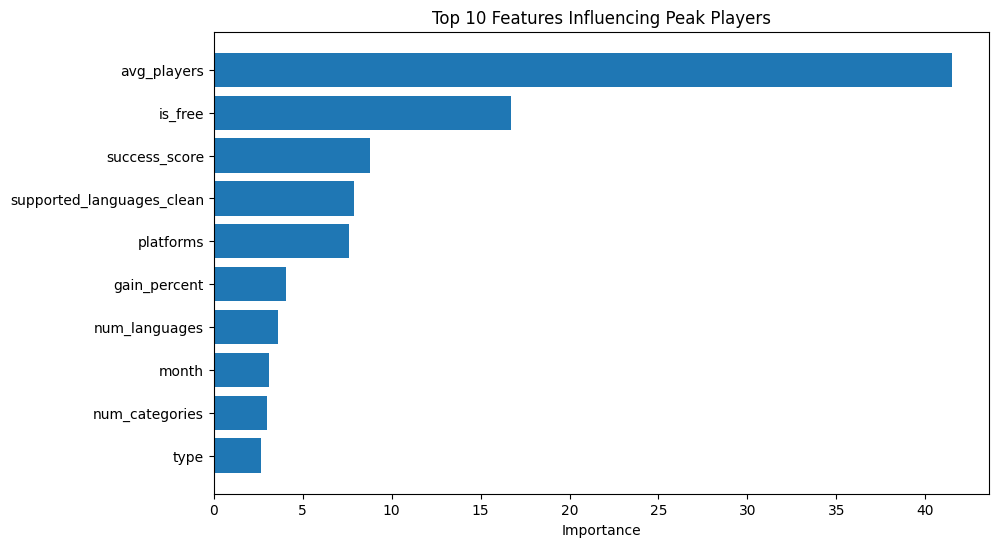

In [74]:
feat_imp = model.get_feature_importance(prettified=True)
top10 = feat_imp.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10['Feature Id'], top10['Importances'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Features Influencing Peak Players')
plt.show()

## Compare Predictions with Actual Values

In [81]:
comparison = pd.DataFrame({
    'Game': X_test.index,  # or 'steam_appid' if you kept it
    'Actual Peak Players': y_test,
    'Predicted Peak Players': preds
})

top_games = comparison.sort_values(by='Predicted Peak Players', ascending=False).head(10)
print(top_games)

      Game  Actual Peak Players  Predicted Peak Players
9515  9515               823694           472636.178632
2183  2183                80723           127476.110002
7484  7484               128667            79691.394234
2291  2291                51423            79554.146797
9932  9932                40607            39179.257861
1147  1147                23023            35823.163582
8660  8660                24446            33146.568485
8463  8463                25955            30370.366094
14      14                15353            28953.252576
8262  8262                25649            28118.653209


## Identify Potential Hits

In [78]:
# Flag predicted hits (example threshold: >100 peak players)
comparison['High Popularity'] = comparison['Predicted Peak Players'] > 100

# View games predicted to be popular
top_predicted = comparison[comparison['High Popularity']].sort_values(by='Predicted Peak Players', ascending=False)
print(top_predicted)

      Game  Actual Peak Players  Predicted Peak Players  High Popularity
9515  9515               823694           472636.178632             True
2183  2183                80723           127476.110002             True
7484  7484               128667            79691.394234             True
2291  2291                51423            79554.146797             True
9932  9932                40607            39179.257861             True
1147  1147                23023            35823.163582             True
8660  8660                24446            33146.568485             True
8463  8463                25955            30370.366094             True
14      14                15353            28953.252576             True
8262  8262                25649            28118.653209             True
5802  5802                31229            27539.265264             True
6774  6774                27227            27156.681506             True
3080  3080                26122            26886.04

## Model Reliability

In [79]:
comparison['Error'] = comparison['Predicted Peak Players'] - comparison['Actual Peak Players']
comparison['Abs Error'] = comparison['Error'].abs()
print(comparison.sort_values(by='Abs Error', ascending=False).head(10))

      Game  Actual Peak Players  Predicted Peak Players  High Popularity  \
9515  9515               823694           472636.178632             True   
7484  7484               128667            79691.394234             True   
2183  2183                80723           127476.110002             True   
2291  2291                51423            79554.146797             True   
14      14                15353            28953.252576             True   
1147  1147                23023            35823.163582             True   
8660  8660                24446            33146.568485             True   
2168  2168                17584             9794.505171             True   
4345  4345                 2858             8974.366045             True   
2133  2133                 8548            14592.576722             True   

              Error      Abs Error  
9515 -351057.821368  351057.821368  
7484  -48975.605766   48975.605766  
2183   46753.110002   46753.110002  
2291   28131.14

## Visual Analysis

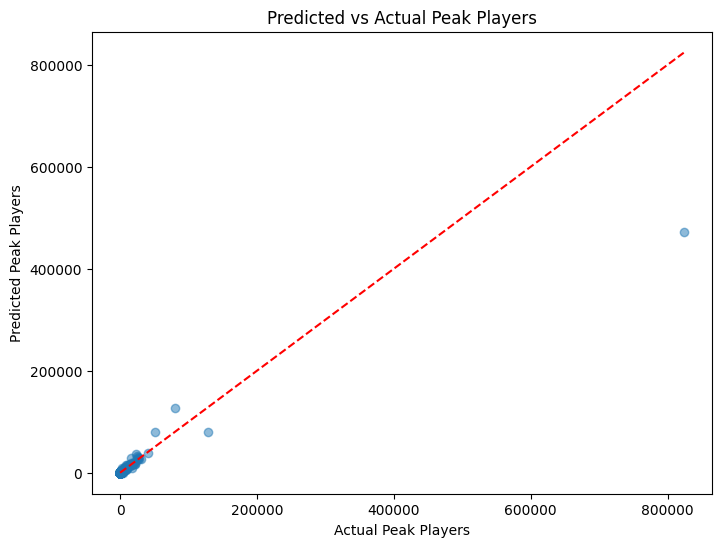

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(comparison['Actual Peak Players'], comparison['Predicted Peak Players'], alpha=0.5)
plt.plot([0, comparison['Actual Peak Players'].max()], [0, comparison['Actual Peak Players'].max()], color='red', linestyle='--')
plt.xlabel("Actual Peak Players")
plt.ylabel("Predicted Peak Players")
plt.title("Predicted vs Actual Peak Players")
plt.show()